In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting Birds
We are intrested in 'birds' so on our plots birds will be represented by points and to plot multiple points use 
matplotlib 'scatter' function.

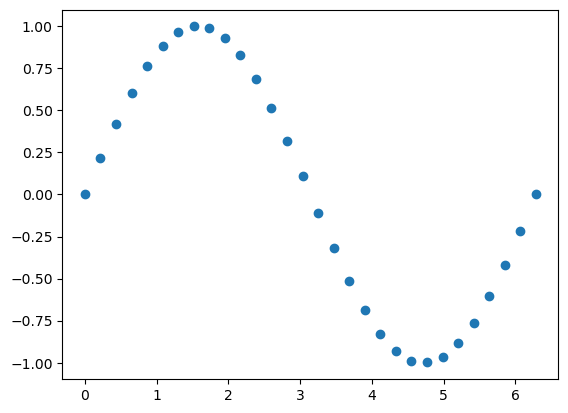

In [6]:
""" We used before: """
num_of_pts = 30
pts = np.linspace(0, 2*np.pi, num_of_pts)
val = np.sin(pts)

plt.scatter(pts,val)
plt.show()

Let's create random flock of birds. Routine for creating "random generator" is:

In [8]:
from numpy.random import default_rng
rng = default_rng() 

Now we can use rng's multiple methods - for the list of distribution look:<br>
https://numpy.org/doc/stable/reference/random/generator.html#distributions.

To make a sample from uniform distribution on the interval $[0,1)$ we can use .random() method.

In [10]:
data = rng.random(num_of_pts)
data

array([0.97994316, 0.09067983, 0.1546505 , 0.6913648 , 0.06464321,
       0.90419394, 0.13226641, 0.27047759, 0.81580507, 0.11158029,
       0.46963543, 0.97913502, 0.66258397, 0.24867864, 0.88360667,
       0.0288206 , 0.98594   , 0.5604709 , 0.34792058, 0.35770325,
       0.52739204, 0.07935275, 0.21802331, 0.78100614, 0.78677778,
       0.18921574, 0.10165367, 0.48059805, 0.86489496, 0.13809161])

Now we need two coordinates for positions so we can reshape the above list.

In [12]:
data = rng.random(num_of_pts).reshape(2,-1)
print(data)

[[0.96386405 0.51935718 0.68193701 0.81186339 0.37808191 0.13126278
  0.74292754 0.78911993 0.34650617 0.11808974 0.97644102 0.6378201
  0.09331414 0.81842663 0.63074287]
 [0.99293861 0.53738078 0.79554301 0.80870623 0.7246371  0.58728878
  0.51239694 0.92481822 0.96429444 0.65144755 0.80813794 0.70880988
  0.68274728 0.280692   0.97383439]]


Important ***new*** thing: * - ***unpacking operator*** .<br>
So we have array of positions but <span style="color:blue">scatter</span> function takes two arguments so we could: <br>
plt.scatter(data\[<span style="color:green">1</span>\], data\[<span style="color:green">2</span>\])<br>
but it is long and there is better way using unpacking operator:<br>
plt.scatter(*data)

<function matplotlib.pyplot.show(close=None, block=None)>

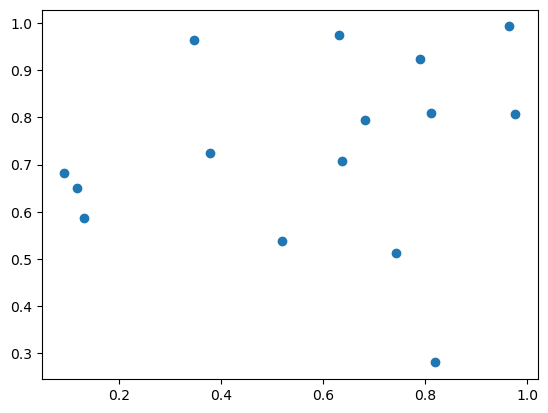

In [15]:
plt.scatter(*data)
plt.show

Homework. <br>
1. Read about argument and parameter difference here: 
https://docs.python.org/3/faq/programming.html#faq-argument-vs-parameter
2. Have a look on this page:
https://www.geeksforgeeks.org/matplotlib-tutorial/

# Solving ODEs
Ok, we know how to plot our birds, let's learn how solve basic ODE.<br>
We are going to solve and plot solution and solution and draw a Phase portrait.

Using scipy pacage and function <span style="color:blue">solve_ivp</span> we may numerically solve equation<br>
$$y'(x) = cos(x).$$

In [45]:
from scipy.integrate import solve_ivp

sol = solve_ivp(lambda t, y : np.cos(t),    # RHS callable function
                t_span = (0, 2*np.pi),      # time interval
                y0 = [0],                   # initial value
                method='RK45',              # which method of solving use code 'RK45' is for Runge-Kutta method of order 5(4)
                dense_output=True )         # this is an option if we want solve_ivp to return approximations or just raw data points.
sol.message

'The solver successfully reached the end of the integration interval.'

### Comment on pure function call lambda

Expression <br>
<span style="color:green">lambda</span> x  : some_operations_on_x <br> 
creates an function object which can be called.

In [194]:
(lambda x : x**2-x)(7)

42

In [205]:
""" definition of a function named: this_is_also_valid """
this_is_also_valid = lambda x : x**3-x**2+13
print( this_is_also_valid(0) ) 

# """special property of np.arrays is that it can be written as an argument of the lambda function """
# print( this_is_also_valid(np.linspace(-3, 3, 8)) )

# """ it also works for multidimentional arrays """
# print( this_is_also_valid(np.linspace(-3, 3, 8).reshape(2,4)) ) 

13


If you wish to do the following operation $$[x_1,x_2,x_3, \ldots,x_n] \quad -f-> \quad [f(x_1),f(x_2),f(x_3),\ldots,f(x_n)]$$
this is called ***map*** and can be applied to iterables

In [209]:
this_is_some_list = [-1, 0, 1, -4, 7, 1.32]
list(map(this_is_also_valid, this_is_some_list)) #list function is neccecary because map is ancient history and you should use list comprehension

[11, 13, 13, -67, 307, 13.557568]

#### List comprehension

To perform a mapping of a funtion over an iterabe such as list we use syntax which looks like set-builder notation from math.<br>
https://en.wikipedia.org/wiki/List_comprehension

In [215]:
[this_is_also_valid(el) for el in this_is_some_list]    # looks like f(A) = {f(x) : x in A}

[11, 13, 13, -67, 307, 13.557568]

### Drawing ODE solution
Let's draw the calculated result called sol below.

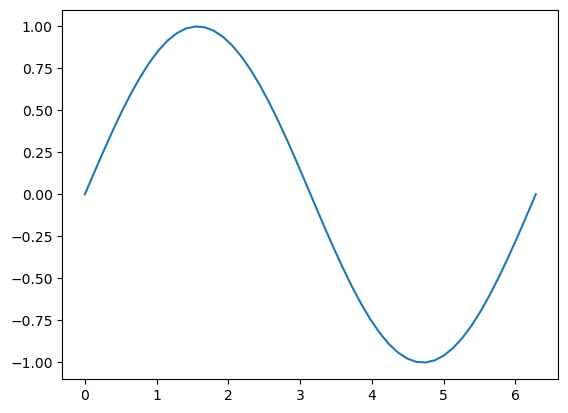

In [46]:
num_of_pts = 50
pts = np.linspace(0, 2*np.pi, num_of_pts) 
val = sol.sol(pts).ravel()

plt.plot(pts, val)
plt.show()

Function solve_ivp returns many things, check: print(sol)  
Method .<span style="color:blue">sol</span> is a way of accessing the aproximated solutions and is possible only if 
parameter dense_output is True, i.e.:<br> dense_output=<span style="color:green">True</span>.<br>
Notice that if we solved ODE this way we can now draw arbitrarily large plots beacuse we have aproximate solution (stored as some Bézier curve maybe )

In [42]:
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001C0D52F96D0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 3.41202733e+00, 5.71603489e+00,
       6.28318531e+00])
 t_events: None
        y: array([[ 0.00000000e+00,  9.99999998e-05,  1.09999978e-03,
         1.10997721e-02,  1.10871586e-01,  8.96187452e-01,
        -2.66791566e-01, -5.37059946e-01,  1.70821405e-04]])
 y_events: None


Now let's say we want to draw some kind of Phase portrait of ODE 
$$ y'(t) = \sin(t) - \cos(3y).$$
We can start solve_ivp solution from many different places:

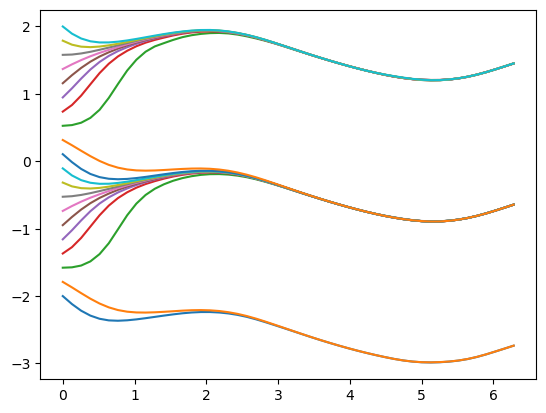

In [47]:
""" how many starting places we want and initial values where we shall start solutions """
num_of_plots, y_min, y_max = 20, -2, 2
y0_pts = np.linspace(y_min, y_max, num_of_plots)  # explicit values for y0 in solve_ivp

""" let's store our solutions in a list, thus there are going to be num_of_plots solutions """
solution_list = [0]* num_of_plots

""" we also going to need(not necessarily) some place to store data for drawing hence let's create"""
value_list = [0]* num_of_plots

""" In the loop below we solve and plot one solution: """
for i, y0 in enumerate(y0_pts):
    solution_list[i] = solve_ivp(lambda x, y : np.sin(x)-np.cos(3*y), 
                                 t_span = (0, 2*np.pi), 
                                 y0 = np.array([y0]),
                                 method='RK45', 
                                 dense_output=True)
    value_list[i] = solution_list[i].sol(pts).ravel()
    plt.plot(pts, value_list[i])
plt.show()




Now the above gives us a little information of what Phase portrait of $ y'(t) = \sin(t) - \cos(3y)$ may look like but it has some big white spaces.<br> Let's say we want to draw what is happening in those blank areas. In order to do this we may want to start solution in an regular array of points. 

In [79]:
""" Creating an array of equally spaced points in many dimensions"""
# exammple 2-dimensions
pt = np.linspace(0, 1, 3)
x,y = np.meshgrid(pt, pt)    # funtion np.meshgrid returns a list 

[array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0. , 0. , 0. ],
        [0.5, 0.5, 0.5],
        [1. , 1. , 1. ]])]

In [80]:
""" two arrays of coordinates in first array there are x-coords and in second y-coords """
np.array(np.meshgrid(pt, pt)).shape

(2, 3, 3)

In [78]:
""" Observe """
print(f"Shape of transpose array is {np.array(np.meshgrid(pt, pt)).T.shape}.")
np.array(np.meshgrid(pt, pt)).T

Shape of transpose array is (3, 3, 2).


array([[[0. , 0. ],
        [0. , 0.5],
        [0. , 1. ]],

       [[0.5, 0. ],
        [0.5, 0.5],
        [0.5, 1. ]],

       [[1. , 0. ],
        [1. , 0.5],
        [1. , 1. ]]])

In [74]:
""" We can extract starting positions for our future solutions using reshape """
np.array(np.meshgrid(pt, pt)).T.reshape(-1,2) 

array([[0. , 0. ],
       [0. , 0.5],
       [0. , 1. ],
       [0.5, 0. ],
       [0.5, 0.5],
       [0.5, 1. ],
       [1. , 0. ],
       [1. , 0.5],
       [1. , 1. ]])

The above aproach the same in many dimensions.

In [138]:
""" exammple with dim - dimensions and res - resolution """
# For those who used wolfram mathematica, below code has similar effect to: Tuples[ Subdivide[0, 1, res], dim]

dim, res = 2, 3
pt = np.linspace(0, 1, res)
mesh = np.meshgrid(*[pt]*dim)
np.array(mesh).T.reshape(-1, dim)

array([[0. , 0. ],
       [0. , 0.5],
       [0. , 1. ],
       [0.5, 0. ],
       [0.5, 0.5],
       [0.5, 1. ],
       [1. , 0. ],
       [1. , 0.5],
       [1. , 1. ]])

We are going to draw solutions of some fixed the length starting from gridpoints. <br>
Let's try to produce $2\pi \times \pi$ picture, therefore there is going to be different 
number of points in x and y direction.

In [170]:
""" For now lets adjust number of points and ranges manually: """
dim, res = 2, 10
x_range = 2 * np.pi
y_range = np.pi

pt_x = np.linspace(0, x_range, 2*res-1)
pt_y = np.linspace(0, y_range, res)

mesh = np.meshgrid(pt_x, pt_y)
init_pts = np.array(mesh).T.reshape(-1, dim)
# init_pts

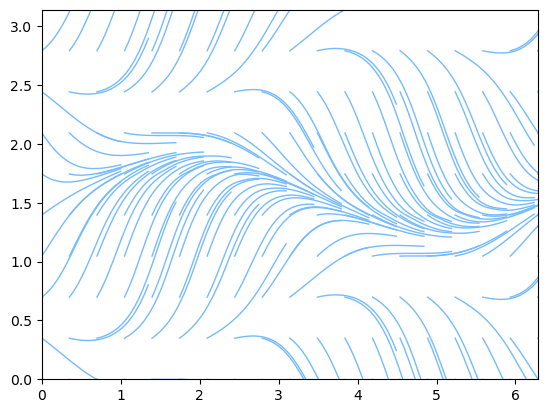

In [171]:
""" Now we proceed the same as before creating a lists of solutions and data 
    and one by one solve every one in a loop """

num_of_plots_grid = res * 2*res - res        # Number of starting points, same as len(pts).
solution_list = [0] * num_of_plots_grid
value_list = [0]* num_of_plots_grid

plt.xlim([0, x_range])
plt.ylim([0, y_range])

for i, pt in enumerate(init_pts):
    solution_list[i] = solve_ivp(lambda x, y : np.sin(x)-np.cos(3*y), 
                                 t_span = (pt[0], pt[0]+1), 
                                 y0 = np.array([pt[1]]),
                                 method='RK45', 
                                 dense_output=True)
    ith_solution_xs = np.linspace(pt[0], pt[0]+1, 20)
    value_list[i] = solution_list[i].sol(ith_solution_xs).ravel()
    plt.plot(ith_solution_xs, value_list[i], c='xkcd:sky blue', linewidth=1)  # linewidth=0.2 with res 30
plt.show()